In [23]:
from pandas import *
import matplotlib as mpl
mpl.rc('figure', figsize=(12, 6))
options.display.max_columns=18

% matplotlib inline 


months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [3]:
fec = read_csv('P00000001-ALL.txt')

/Users/hwwulsin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [5]:
parties    # dictionary

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [6]:
fec.cand_nm

0         Bachmann, Michelle
1         Bachmann, Michelle
2         Bachmann, Michelle
3         Bachmann, Michelle
4         Bachmann, Michelle
5         Bachmann, Michelle
6         Bachmann, Michelle
7         Bachmann, Michelle
8         Bachmann, Michelle
9         Bachmann, Michelle
10        Bachmann, Michelle
11        Bachmann, Michelle
12        Bachmann, Michelle
13        Bachmann, Michelle
14        Bachmann, Michelle
15        Bachmann, Michelle
16        Bachmann, Michelle
17        Bachmann, Michelle
18        Bachmann, Michelle
19        Bachmann, Michelle
20        Bachmann, Michelle
21        Bachmann, Michelle
22        Bachmann, Michelle
23        Bachmann, Michelle
24        Bachmann, Michelle
25        Bachmann, Michelle
26        Bachmann, Michelle
27        Bachmann, Michelle
28        Bachmann, Michelle
29        Bachmann, Michelle
                 ...        
536011           Perry, Rick
536012           Perry, Rick
536013           Perry, Rick
536014        

In [8]:
fec['party'] = fec.cand_nm.map(parties)  # map can take dictionary, series... 
                                         # Alternatively, use list comprehension: [parties[x] for x in fec.cand_nm]

In [9]:
fec.ix[0]    # A single record.

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                   3.6601e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

In [10]:
fec.party.value_counts()   # Doing it high level way using histogram. 

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [11]:
np.unique(fec.party)

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

In [12]:
fec.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [13]:
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()   # Not a python date object.

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

In [14]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [15]:
print months

{'FEB': 2, 'AUG': 8, 'JAN': 1, 'DEC': 12, 'OCT': 10, 'MAR': 3, 'SEP': 9, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'APR': 4, 'NOV': 11}


In [16]:
def convert_date(val):    # function to convert date to python's date object.
    d, m, y = val.split('-')
    m = months[m]
    return datetime(int ('20' + y), m, int(d))

fec.contb_receipt_dt   # output a list of date (not yet in python objects).
fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(convert_date)

In [17]:
fec.contb_receipt_dt[0]

Timestamp('2011-06-20 00:00:00')

In [18]:
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum() # Same as above, however, date converted to python object.

party       contb_receipt_dt
Democrat    2011-04-04           640235.12
            2011-04-05           307641.00
            2011-04-06           247542.59
            2011-04-07           252336.00
            2011-04-08           295452.00
            2011-04-09           105879.00
            2011-04-10           100373.00
            2011-04-11           360728.00
            2011-04-12           405160.46
            2011-04-13           382836.33
            2011-04-14           306643.50
            2011-04-15           408377.00
            2011-04-16            82658.00
            2011-04-17            70802.00
            2011-04-18           501971.37
            2011-04-19           304874.00
            2011-04-20           314540.11
            2011-04-21           315618.00
            2011-04-22           295464.45
            2011-04-23            34829.00
            2011-04-24            37100.00
            2011-04-25           447282.00
            2011-04-26   

In [19]:
by_date = fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()

In [21]:
by_date.unstack('party').head()   # Indexes are dates. Columns are political parties.

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,NaN,NaN,NaN,8600.0
2011-01-03,NaN,NaN,NaN,4800.0
2011-01-04,NaN,NaN,NaN,5000.0
2011-01-12,NaN,NaN,NaN,4150.0
2011-01-13,NaN,NaN,NaN,4000.0


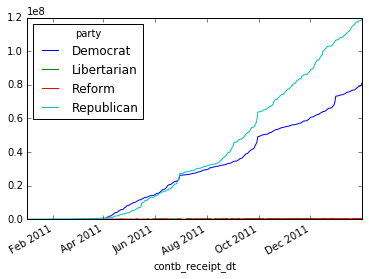

In [24]:
by_date.unstack('party').cumsum().plot()

In [25]:
s = by_date.unstack('party')[-5:].stack()

In [26]:
s    # Note the inner level indexes. Not every date has 3 parties. Top level indexes are dates. stack() makes 1 dimensional.
     # Labels propagated down for all 3 observations: political parties.

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41
dtype: float64

In [28]:
options.display.notebook_repr_html=False  # turn off html, i.e., without table.
s.unstack()    # unstack() 2 dimensional. 

party               Democrat   Reform  Republican
contb_receipt_dt                                 
2012-01-27         305785.47  3176.37   368441.82
2012-01-28         235492.85   175.00    82775.80
2012-01-29          93177.00   200.00    75220.02
2012-01-30         435921.72   130.00   255204.80
2012-01-31        1418410.31   150.00   869890.41

In [31]:
s.unstack().stack()  # 2 dimensional to 1 dimensional

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41

In [34]:
df = s.unstack('party')   # data frame

In [33]:
s.unstack('contb_receipt_dt')

contb_receipt_dt  2012-01-27  2012-01-28  2012-01-29  2012-01-30  2012-01-31
party                                                                       
Democrat           305785.47   235492.85    93177.00   435921.72  1418410.31
Reform               3176.37      175.00      200.00      130.00      150.00
Republican         368441.82    82775.80    75220.02   255204.80   869890.41

In [35]:
concat([df, df], axis=1, keys=['A', 'B'])  # join 2 copies of data frame.
                                           # standard hierarchical indexing stuff.

                           A                                B                     
party               Democrat   Reform  Republican    Democrat   Reform  Republican
contb_receipt_dt                                                                  
2012-01-27         305785.47  3176.37   368441.82   305785.47  3176.37   368441.82
2012-01-28         235492.85   175.00    82775.80   235492.85   175.00    82775.80
2012-01-29          93177.00   200.00    75220.02    93177.00   200.00    75220.02
2012-01-30         435921.72   130.00   255204.80   435921.72   130.00   255204.80
2012-01-31        1418410.31   150.00   869890.41  1418410.31   150.00   869890.41

In [36]:
concat([df, df], axis=1, keys=['A', 'B'])['A']   # select out columns by the first key 'A'. Or select out the 'B' group.conc

party               Democrat   Reform  Republican
contb_receipt_dt                                 
2012-01-27         305785.47  3176.37   368441.82
2012-01-28         235492.85   175.00    82775.80
2012-01-29          93177.00   200.00    75220.02
2012-01-30         435921.72   130.00   255204.80
2012-01-31        1418410.31   150.00   869890.41

In [37]:
concat([df, df], axis=1, keys=['A', 'B']).stack('party')

                                      A           B
contb_receipt_dt party                             
2012-01-27       Democrat     305785.47   305785.47
                 Reform         3176.37     3176.37
                 Republican   368441.82   368441.82
2012-01-28       Democrat     235492.85   235492.85
                 Reform          175.00      175.00
                 Republican    82775.80    82775.80
2012-01-29       Democrat      93177.00    93177.00
                 Reform          200.00      200.00
                 Republican    75220.02    75220.02
2012-01-30       Democrat     435921.72   435921.72
                 Reform          130.00      130.00
                 Republican   255204.80   255204.80
2012-01-31       Democrat    1418410.31  1418410.31
                 Reform          150.00      150.00
                 Republican   869890.41   869890.41

In [38]:
concat([df, df], axis=1, keys=['A', 'B']).stack(0)  # The group indexes have no labels.

party                 Democrat   Reform  Republican
contb_receipt_dt                                   
2012-01-27       A   305785.47  3176.37   368441.82
                 B   305785.47  3176.37   368441.82
2012-01-28       A   235492.85   175.00    82775.80
                 B   235492.85   175.00    82775.80
2012-01-29       A    93177.00   200.00    75220.02
                 B    93177.00   200.00    75220.02
2012-01-30       A   435921.72   130.00   255204.80
                 B   435921.72   130.00   255204.80
2012-01-31       A  1418410.31   150.00   869890.41
                 B  1418410.31   150.00   869890.41

In [40]:
result = fec.groupby(['cand_nm', 'contbr_occupation'])['contb_receipt_amt'].sum()   # Top contributors to candidates by occupation.

In [41]:
result  # is a data frame instead of series.

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
...


In [42]:
result[:, 'ZOMBIE SLAYER']

cand_nm
Paul, Ron    1556
Name: contb_receipt_amt

In [43]:
result = fec.groupby(['cand_nm', 'contbr_occupation']).sum()  # When doing this aggregation, we don't need to select the columns as above.
# There are columns that are not possible to sum. The code actually tries to sum them all: nuisance columns. Whenever it fails, it just silently drops them out.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40171 entries, ('Bachmann, Michelle', '100% DISABLED VETERAN') to ('Santorum, Rick', 'YOUTH MINISTER')
Data columns:
contb_receipt_amt    40171  non-null values
file_num             40171  non-null values
dtypes: float64(2)

In [44]:
result = result.reset_index()  # opposite of set_index(). Took 'cand_nm' and 'contbr_occupation' and set them as col indexes again, so that the indexes are just simple integer indexes.

In [45]:
result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40171 entries, 0 to 40170
Data columns:
cand_nm              40171  non-null values
contbr_occupation    40171  non-null values
contb_receipt_amt    40171  non-null values
dtypes: float64(1), object(2)

In [48]:
# We have so far aggregated total amount donated to each political party by occupation (the first groupby).
# Additional groupby let us split them up by candidate, sort them in descending order by total amount donated and take the top 5.
set_printoptions(notebook_repr_html=True)
def top5_donors(group):
    return group.sort_index(by='contb_receipt_amt')[-5:]
# top5_donors(result)
result.groupby('cand_nm').apply(top5_donors)   # The retired donated the most to Barack Obama.

,,cand_nm,contbr_occupation,contb_receipt_amt
cand_nm,None,,,
"Bachmann, Michelle",921,"Bachmann, Michelle",PRESIDENT,68781.00
"Bachmann, Michelle",893,"Bachmann, Michelle",PHYSICIAN,76134.00
"Bachmann, Michelle",555,"Bachmann, Michelle",HOMEMAKER,102540.00
"Bachmann, Michelle",594,"Bachmann, Michelle",INFORMATION REQUESTED,147638.89
"Bachmann, Michelle",1059,"Bachmann, Michelle",RETIRED,824618.05
"Cain, Herman",1537,"Cain, Herman",CEO,125097.00
"Cain, Herman",2227,"Cain, Herman",PHYSICIAN,125790.96
"Cain, Herman",1898,"Cain, Herman",HOMEMAKER,153964.07
"Cain, Herman",2391,"Cain, Herman",RETIRED,779635.51


In [49]:
df._data   # Internal data structure. The back data frame. Having hierarchical indexing medicates a lot of the need for higher dimensional objects (because they're very sparse).

BlockManager
Items: array([Democrat, Reform, Republican], dtype=object)
Axis 1: <class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-27 00:00:00, ..., 2012-01-31 00:00:00]
Length: 5, Freq: None, Timezone: None
FloatBlock: array([Democrat, Reform, Republican], dtype=object), 3 x 5, dtype float64

In [ ]:
# Time Series for financial data will be improved next.